In [16]:
# Imports section
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Part 1. Loading the dataset

In [2]:
# Using pandas load the dataset (load remotely, not locally)
url = "https://raw.githubusercontent.com/profmcnich/example_notebook/main/science_data_large.csv"
slime_df = pd.read_csv(url)
# Output the first 15 rows of the data
slime_df.head(15)

,Temperature °C,Mols KCL,Size nm^3
0,469,647,6.244743e+05
1,403,694,5.779610e+05
2,302,975,6.196847e+05
3,779,916,1.460449e+06
4,901,18,4.325726e+04
5,545,637,7.124634e+05
6,660,519,7.006960e+05
7,143,869,2.718260e+05
8,89,461,8.919803e+04
9,294,776,4.770210e+05


In [3]:
# Display a summary of the table information (number of datapoints, etc.)
slime_df.describe()

,Temperature °C,Mols KCL,Size nm^3
count,1000.000000,1000.000000,1.000000e+03
mean,500.500000,471.530000,5.086111e+05
std,288.819436,288.482872,4.474838e+05
min,1.000000,1.000000,1.611429e+01
25%,250.750000,226.750000,1.298267e+05
50%,500.500000,459.500000,3.827182e+05
75%,750.250000,710.250000,7.603211e+05
max,1000.000000,1000.000000,1.972127e+06


Showing plots of both Temperature ˚C vs. Size nm^3 and Moles KCL vs. Size nm^3 to get a more in depth look at the data.

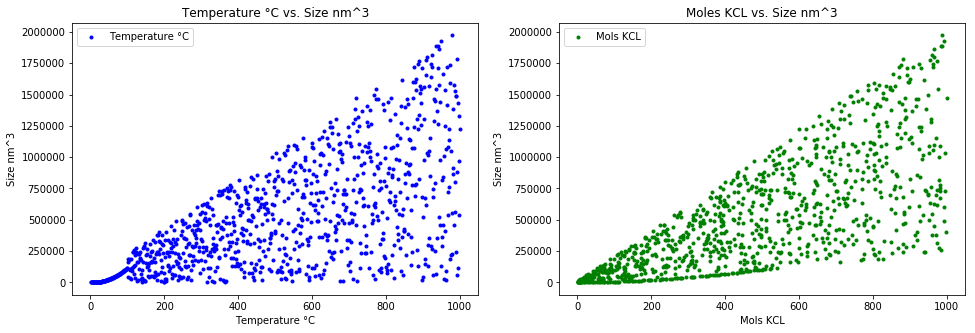

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(slime_df['Temperature °C'], slime_df['Size nm^3'], 'b.')
plt.title('Temperature °C vs. Size nm^3')
plt.legend(['Temperature °C'])
plt.ylabel('Size nm^3')
plt.xlabel('Temperature °C')

plt.subplot(1,2,2)
plt.plot(slime_df['Mols KCL'], slime_df['Size nm^3'], 'g.')
plt.title('Moles KCL vs. Size nm^3')
plt.legend(['Mols KCL'])
plt.ylabel('Size nm^3')
plt.xlabel('Mols KCL')
plt.show()

## Part 2. Splitting the dataset

In [5]:
# Take the pandas dataset and split it into our features (X) and label (y)
X = slime_df.columns[0:2]
y = slime_df.columns[2]
# Use sklearn to split the features and labels into a training/test set. (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(
    slime_df[X], slime_df[y], test_size=0.1, random_state=0)

I want to take a look at the number of rows in each of the training and testing data sets to ensure that we have a 90/10 split. Additionally, we will just look at the columns of each to ensure we are using the proper features and labels.

In [6]:
print("Amount of rows in X_train: ", len(X_train))
print("Amount of rows in X_test: ", len(X_test))
print("Amount of rows in y_train: ", len(y_train))
print("Amount of rows in y_test: ", len(y_test))
print("X_train columns: ", X_train.columns)
print("y_train columns: ", y_train.name)

Amount of rows in X_train:  900
Amount of rows in X_test:  100
Amount of rows in y_train:  900
Amount of rows in y_test:  100
X_train columns:  Index(['Temperature °C', 'Mols KCL'], dtype='object')
y_train columns:  Size nm^3


## Part 3. Perform a Linear Regression

In [7]:
# Use sklearn to train a model on the training set
regression = LinearRegression().fit(X_train, y_train)

In [8]:
# Create a sample datapoint and predict the output of that sample with the trained model
regression.predict(np.array([[505, 470]])) 

array([508682.4230905])

Quickly, I just wanted to visualize and look at the scores of the predictions that we make. This will help us understand how good or bad our predictions are.

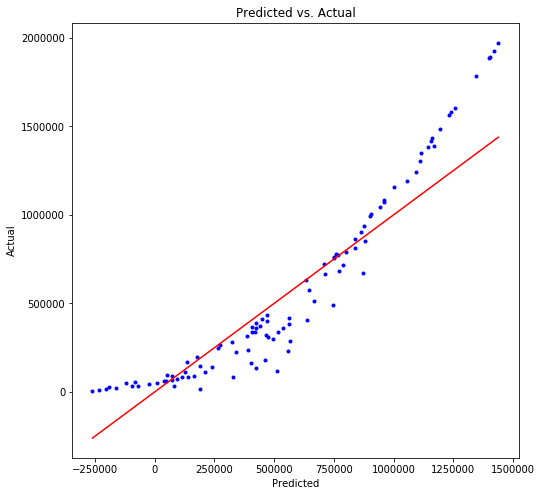

In [9]:
y_pred = regression.predict(X_test)
plt.figure(figsize = (8,8))
plt.plot(y_pred, y_test, 'b.')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'r-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs. Actual')
plt.show()

The score of the model is the coefficient of determination (${R^2}$) and measures how well the actual variance from x to y values is represented in the x values and the predicted y values. Generally, the closer to 1 your score is, the better.

In [10]:
# Report on the score for that model, in your own words (markdown, not code) explain what the score means
regression.score(X_test, y_test)

0.8761646752736477

In [11]:
# Extract the coefficents and intercept from the model and write an equation for your h(x) using LaTeX
print(regression.coef_)
print(regression.intercept_)

[ 863.58108791 1006.12741921]
-400305.9133335322


Equation: $h(x) = -400305.91333 + 863.58109x + 1006.12742{x^2}$

## Part 4. Use Cross Validation

In [12]:
# Use the cross_val_score function to repeat your experiment across many shuffles of the data
scores = cross_val_score(regression, slime_df[X], slime_df[y], cv=25)
scores

array([0.74149719, 0.85415186, 0.86221008, 0.8923489 , 0.82673245,
       0.80673516, 0.9146214 , 0.87152698, 0.8751425 , 0.83148779,
       0.90317962, 0.84414796, 0.84319376, 0.87582798, 0.83409665,
       0.89405867, 0.87218016, 0.87398851, 0.86636549, 0.84611103,
       0.75113255, 0.78696491, 0.85806865, 0.90124313, 0.88250286])

In [13]:
# Report on their finding and their significance
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.85 accuracy with a standard deviation of 0.04


The average score across the different shuffles of the data is a little lower than that of in our single Linear Regression.

## Part 5. Using Polynomial Regression

In [31]:
# Using the PolynomialFeatures library perform another regression on an augmented dataset of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(slime_df[X])
poly_regression = LinearRegression()
poly_regression.fit(X_poly, slime_df[y])

(1000, 6)

In [32]:
# Report on the metrics and output the resultant equation as you did in Part 3.
print(poly_regression.score(X_poly, slime_df[y]))

1.0


In [33]:
print(poly_regression.coef_)
print(poly_regression.intercept_)

[ 0.00000000e+00  1.20000000e+01 -1.23110504e-07 -1.05648823e-11
  2.00000000e+00  2.85714287e-02]
1.657189568504691e-05


Equation: $h(x) = 1.65719*10^{-5}  + (1.2*10^{1})x^{2} - (1.23111*10^{-7})x^{3} - (1.05649*10^{-11})x^{4} + 2x^{5} + (2.85714*10^{-2}x^{6}$